In [1]:
import numpy as np
from matplotlib import pyplot as plt


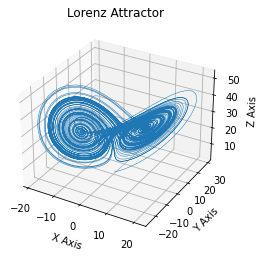

In [2]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    """
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    """
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

x10 = np.empty(num_steps + 1)
x20 = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    if i > 10:
        x10[i + 1] = xs[i-10]
    else: 
        x10[i+1] = x10[i]
    if i > 20:
        x20[i + 1] = xs[i-10]
    else:
        x20[i+1] = x20[i]
    
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

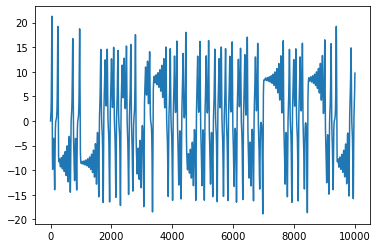

In [3]:
plt.plot(np.arange(0, 10001),xs)

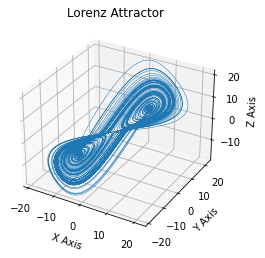

In [4]:
# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(xs, x10, x20, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [5]:
coords = np.vstack((xs,ys,zs))
print(coords.shape)
U, s, V = np.linalg.svd(coords)
U.shape, s.shape, V.shape


(3, 10001)


((3, 3), (3,), (10001, 10001))

In [18]:
print(np.vstack((U[:,0], U[:,1], U[:,2])).shape)
basis = np.vstack((U[:,0], U[:,1], U[:,2]))
coordssvd = np.linalg.solve(basis, coords)
coordssvd

(3, 3)


array([[ 1.44893737e+00,  1.42076498e+00,  1.41187470e+00, ...,
         2.36928634e+01,  2.45591178e+01,  2.54806038e+01],
       [ 5.48611547e-02,  6.53624318e-02,  9.50734280e-02, ...,
        -3.14136969e+00, -3.13526216e+00, -3.21512814e+00],
       [-8.41080418e-03, -1.08311932e-01, -1.97423181e-01, ...,
        -8.89083322e+00, -9.35744543e+00, -9.83587794e+00]])

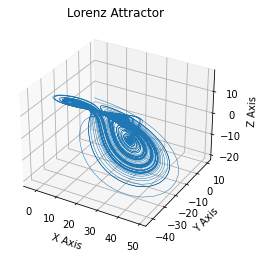

In [19]:
# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(coordssvd[0], coordssvd[1], coordssvd[2], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [8]:
delays = np.vstack((xs,x10,x20))
print(delays.shape)
U1, s1, V1 = np.linalg.svd(delays)
U1.shape, s1.shape, V1.shape

(3, 10001)


((3, 3), (3,), (10001, 10001))

In [20]:
basis = np.vstack((U1[:,0], U1[:,1], U1[:,2]))
delayssvd = np.linalg.solve(basis, delays)
delayssvd

array([[ 8.96056185e-312, -5.56163429e-002, -1.05114888e-001, ...,
        -8.03071879e-001, -8.44616646e-001, -8.79161721e-001],
       [-1.18634935e-311, -5.87659210e-002, -1.11067591e-001, ...,
        -1.05543013e+001, -1.11106052e+001, -1.16920231e+001],
       [ 3.38319764e-312, -5.87655420e-002, -1.11066874e-001, ...,
        -3.61708044e+000, -3.80713997e+000, -3.99907689e+000]])

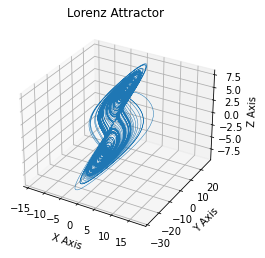

In [21]:
# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(delayssvd[0], delayssvd[1], delayssvd[2], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

<ipython-input-25-a82974507da1>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  figure.add_axes(axes)


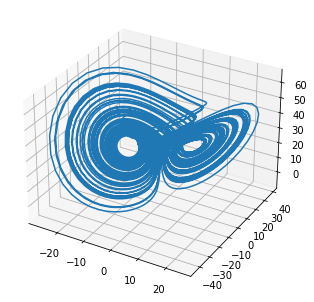

In [25]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

figure = plt.figure()
axes = Axes3D(figure)
axes.plot3D(data[0], data[1], data[2])
figure.add_axes(axes)
plt.show()